In [76]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import BaggingClassifier
from sklearn.ensemble        import AdaBoostClassifier

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


dataset = pd.read_csv("diabetes.csv", header=0)

col_atributos = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train, X_test, y_train, y_test = train_test_split(dataset[col_atributos], dataset.Outcome, test_size=0.3, random_state=1)

In [77]:
tree = DecisionTreeClassifier()
#base_estimator : O estimador base para ajustar subconjuntos aleatórios do conjunto de dados. 
#Se Nenhum, então o estimador base é uma árvore de decisão.
bagging_dt = BaggingClassifier(
    base_estimator=tree, n_estimators=1500, random_state=42)
bagging_dt.fit(X_train, y_train)

print(f"Test score: {bagging_dt.score(X_test, y_test)}")


Test score: 0.7965367965367965


In [88]:
#n_estimators:o número de estimadores
rf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf.fit(X_train, y_train)

print(f"Test score: {rf.score(X_test, y_test)}")


Test score: 0.7922077922077922


In [71]:
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

print(f"Test score: {adaboost.score(X_test, y_test)}")


Test score: 0.70995670995671


In [80]:
xgb = xgb.XGBClassifier(n_estimators=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

print(f"Test score: {xgb.score(X_test, y_test)}")


Test score: 0.7965367965367965


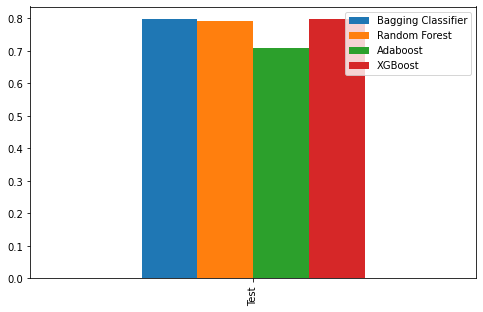

In [81]:
scores = {
    'Bagging Classifier': {        
        'Test': accuracy_score(y_test, bagging_dt.predict(X_test)),
    },
}
scores['Random Forest'] = {    
    'Test': accuracy_score(y_test, rf.predict(X_test)),
}
scores['Adaboost'] = {     
    'Test': accuracy_score(y_test, adaboost.predict(X_test)),
}
scores['XGBoost'] = {
    'Test': accuracy_score(y_test, xgb.predict(X_test)),
}

scores_df = pd.DataFrame(scores)
# with plt.xkcd():

scores_df.plot(kind='bar', figsize=(8, 5))
plt.show()


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(
        y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    #print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [85]:
evaluate(bagging_dt, X_train, X_test, y_train, y_test)


TESTING RESULTS: 
CONFUSION MATRIX:
[[129  17]
 [ 30  55]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.811321   0.763889  0.796537    0.787605      0.793867
recall       0.883562   0.647059  0.796537    0.765310      0.796537
f1-score     0.845902   0.700637  0.796537    0.773269      0.792449
support    146.000000  85.000000  0.796537  231.000000    231.000000


In [84]:
evaluate(rf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[132  14]
 [ 34  51]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.795181   0.784615  0.792208    0.789898      0.791293
recall       0.904110   0.600000  0.792208    0.752055      0.792208
f1-score     0.846154   0.680000  0.792208    0.763077      0.785015
support    146.000000  85.000000  0.792208  231.000000    231.000000


In [83]:
evaluate(adaboost, X_train, X_test, y_train, y_test)


TESTING RESULTS: 
CONFUSION MATRIX:
[[118  28]
 [ 39  46]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.751592   0.621622  0.709957    0.686607      0.703768
recall       0.808219   0.541176  0.709957    0.674698      0.709957
f1-score     0.778878   0.578616  0.709957    0.678747      0.705189
support    146.000000  85.000000  0.709957  231.000000    231.000000


In [82]:
evaluate(xgb, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[131  15]
 [ 32  53]]
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803681   0.779412  0.796537    0.791546      0.794751
recall       0.897260   0.623529  0.796537    0.760395      0.796537
f1-score     0.847896   0.692810  0.796537    0.770353      0.790830
support    146.000000  85.000000  0.796537  231.000000    231.000000
